In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


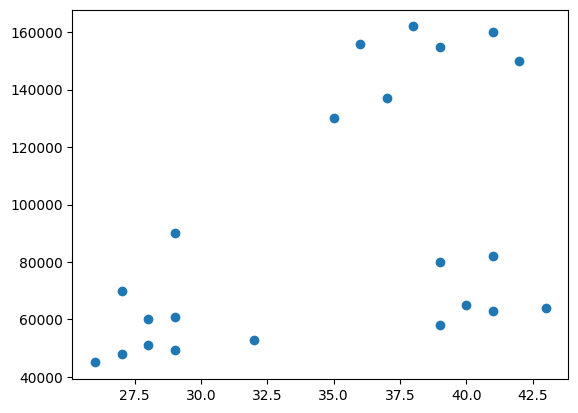

In [4]:
plt.scatter(df['Age'], df['Income($)'])

In [5]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [7]:
df['Cluster'] = y_predicted

In [8]:
df

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


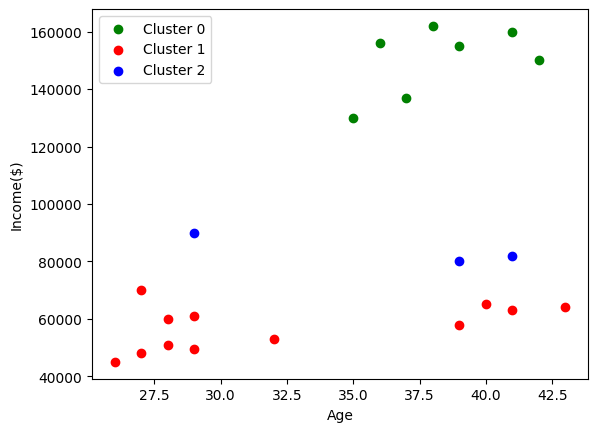

In [9]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

plt.scatter(df1['Age'], df1['Income($)'], color='green', label='Cluster 0')
plt.scatter(df2['Age'], df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3['Age'], df3['Income($)'], color='blue', label='Cluster 2')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [10]:
# as you can see the clusters are not formed properly, this is because of no proper scaling
# so now we scale it

In [19]:
scaler = MinMaxScaler()
# scaler.fit(df[['Income($)']])
# df['Income($)'] = scaler.transform(df[['Income($)']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df

# scaler.fit(df[['Age']])
df['Age'] = scaler.fit_transform(df[['Age']])
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [12]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [13]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [14]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [15]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='green', label='cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='Cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='blue', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'purple', marker = '*', label='Centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'cluster'